In [40]:
import pandas as pd
from numpy import nan
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn import preprocessing
from sklearn.pipeline import make_pipeline
from pandas.tools.plotting import scatter_matrix
plt.rcParams['figure.figsize'] = (10,10)

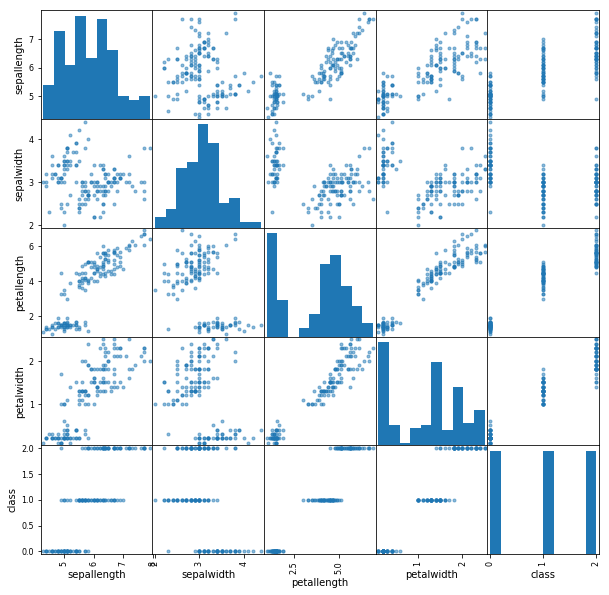

In [43]:
names = ['sepallength', 'sepalwidth', 'petallength', 'petalwidth', 'class']
df = pd.read_csv('iris-data.csv', names=names)
rep = {"Iris-setosa":0, "Iris-versicolor":1, "Iris-virginica":2}
df['class'].replace(rep, inplace=True)
scatter_matrix(df)
plt.show()

In [4]:
df.shape

(150, 5)

In [44]:
#x = df.ix[:,:4]
x = df[['sepallength', 'sepalwidth', 'petalwidth']]
y = df.ix[:,4]

In [45]:
x.shape

(150, 3)

In [8]:
#x_mean = x.mean()
#x_sd = x.std()
#x_norm = (x-x_mean)/(x_sd)


In [9]:
x_norm.mean()

sepallength   -1.457168e-15
sepalwidth    -1.722511e-15
petallength   -2.043551e-15
petalwidth    -9.843977e-17
dtype: float64

In [46]:
#logreg = linear_model.LogisticRegression(C=0.1)
#results = cross_val_score(logreg, x_norm, y, cv=5)
clf = make_pipeline(preprocessing.StandardScaler(), logreg)
results = cross_val_score(clf, x, y, cv=5)
results.mean()

0.84000000000000008

In [11]:
results.mean()

0.83333333333333337

In [48]:
logreg = linear_model.LogisticRegression()
param_grid = {"C":[0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0]}
grid = GridSearchCV(estimator=logreg, param_grid=param_grid)
grid.fit(x,y)
print grid.best_estimator_
print grid.best_score_

LogisticRegression(C=100.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
0.94
